# Predicting client subscription to bank term deposits - A binary classsification problem

Chamila Wijayawardhana, Dialog Axiata PLC


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

* Data Source - https://archive.ics.uci.edu/ml/datasets/Bank+Marketing



In [1]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# Resampling to remove class imbalance
from imblearn.under_sampling import RandomUnderSampler

# Classifier algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn import metrics




# Load Data

In [5]:
file_name = 'https://raw.githubusercontent.com/chamalj1980/ML_Fundementals/main/capstone%20project/bank-full.csv'

data = pd.read_csv(file_name,sep=';')
data.head()
data.head().transpose()

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [ ]:
data.shape

(45211, 17)

In [ ]:
data['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


# Exploratory Data Analytics

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Creating a unique ID

In [ ]:
data.index

RangeIndex(start=0, stop=45211, step=1)

In [ ]:
data['ID'] = data.index + 1
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'ID'],
      dtype='object')

In [ ]:
data = data[['ID','age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']] 

In [ ]:
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Descriptive statistics

In [ ]:
data[['age', 'balance', 'campaign', 'previous', 'pdays']].describe()

,age,balance,campaign,previous,pdays
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,0.580323,40.197828
std,10.618762,3044.765829,3.098021,2.303441,100.128746
min,18.000000,-8019.000000,1.000000,0.000000,-1.000000
25%,33.000000,72.000000,1.000000,0.000000,-1.000000
50%,39.000000,448.000000,2.000000,0.000000,-1.000000
75%,48.000000,1428.000000,3.000000,0.000000,-1.000000
max,95.000000,102127.000000,63.000000,275.000000,871.000000


In [ ]:
data['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

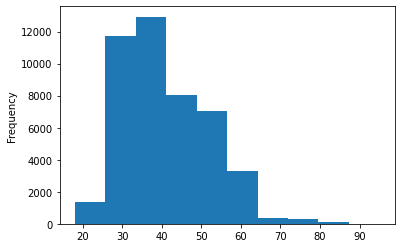

In [ ]:
data['age'].plot(kind='hist', bins=10)

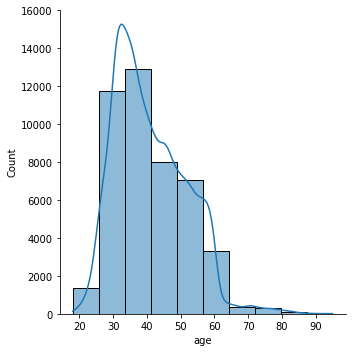

In [ ]:
sns.displot(kind='hist', x='age', data=data, bins=10, kde=True)

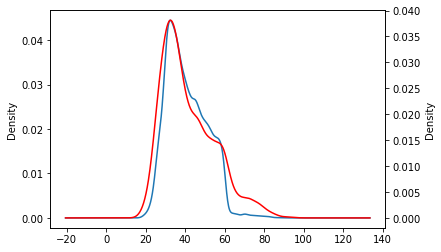

In [ ]:
data_y_yes = data.loc[data['y']=='yes']
data_y_no = data.loc[data['y']=='no']

f, ax0 = plt.subplots()
ax1 = ax0.twinx()
data_y_no['age'].plot(kind ='kde', ax=ax0)
data_y_yes['age'].plot(kind = 'kde',c='red', ax=ax1)


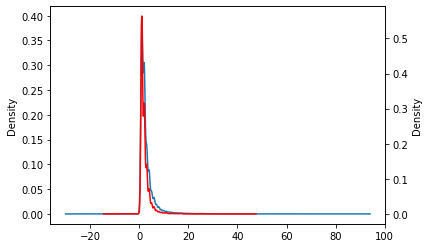

In [ ]:
data_y_yes = data.loc[data['y']=='yes']
data_y_no = data.loc[data['y']=='no']

f, ax0 = plt.subplots()
ax1 = ax0.twinx()
data_y_no['campaign'].plot(kind ='kde', ax=ax0)
data_y_yes['campaign'].plot(kind = 'kde',c='red', ax=ax1)


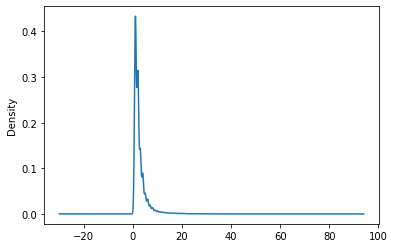

In [ ]:
data['campaign'].plot(kind='kde')

In [ ]:
data['campaign'].skew()

4.898650166179674

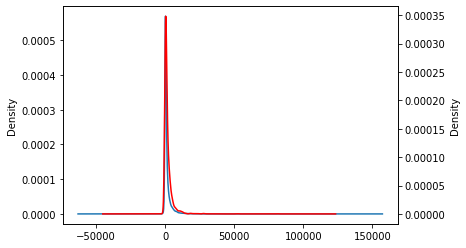

In [ ]:
data_y_yes = data.loc[data['y']=='yes']
data_y_no = data.loc[data['y']=='no']

f, ax0 = plt.subplots()
ax1 = ax0.twinx()
data_y_no['balance'].plot(kind ='kde', ax=ax0)
data_y_yes['balance'].plot(kind = 'kde',c='red', ax=ax1)

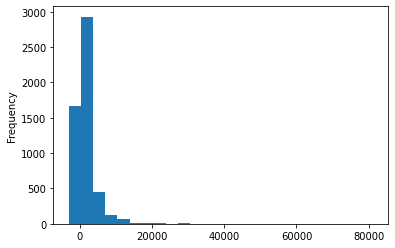

In [ ]:
data_y_yes['balance'].plot(kind='hist', bins= 25,xlabel='balance')

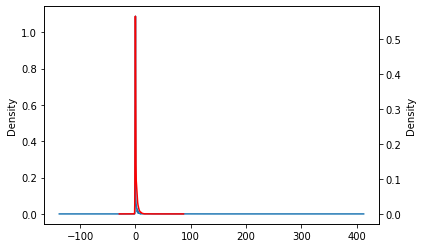

In [ ]:
data_y_yes = data.loc[data['y']=='yes']
data_y_no = data.loc[data['y']=='no']

f, ax0 = plt.subplots()
ax1 = ax0.twinx()
data_y_no['previous'].plot(kind ='kde', ax=ax0)
data_y_yes['previous'].plot(kind = 'kde',c='red', ax=ax1)

In [ ]:
data['scaled_age'] = data['age']/data['age'].max()
data['scaled_age']

0        0.610526
1        0.463158
2        0.347368
3        0.494737
4        0.347368
           ...   
45206    0.536842
45207    0.747368
45208    0.757895
45209    0.600000
45210    0.389474
Name: scaled_age, Length: 45211, dtype: float64

In [ ]:
data['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

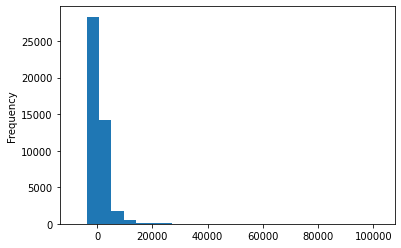

In [ ]:
data['balance'].plot(kind='hist', bins=25)

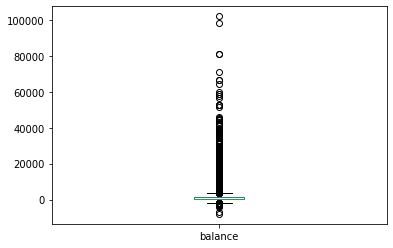

In [ ]:
data['balance'].plot(kind='box')

In [ ]:
data['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
data['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

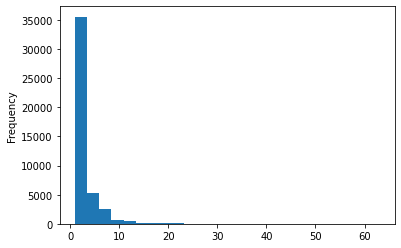

In [ ]:
data['campaign'].plot(kind='hist', bins=25)

In [ ]:
data['campaign'].value_counts(normalize='True')

1     0.388047
2     0.276592
3     0.122116
4     0.077901
5     0.039017
6     0.028555
7     0.016257
8     0.011944
9     0.007233
10    0.005884
11    0.004446
12    0.003428
13    0.002942
14    0.002057
15    0.001858
16    0.001747
17    0.001526
18    0.001128
19    0.000973
20    0.000951
21    0.000774
22    0.000509
23    0.000487
25    0.000487
24    0.000442
28    0.000354
29    0.000354
26    0.000288
31    0.000265
27    0.000221
32    0.000199
30    0.000177
33    0.000133
34    0.000111
36    0.000088
35    0.000088
43    0.000066
38    0.000066
41    0.000044
50    0.000044
37    0.000044
51    0.000022
55    0.000022
46    0.000022
58    0.000022
44    0.000022
39    0.000022
63    0.000022
Name: campaign, dtype: float64

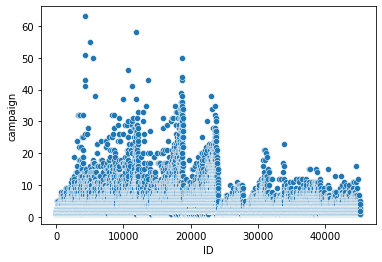

In [ ]:
sns.scatterplot(x=data['ID'], y=data['campaign'])

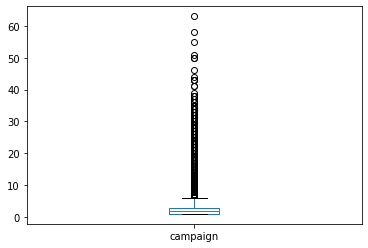

In [ ]:
data['campaign'].plot(kind='box')

In [ ]:
data['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [ ]:
 data['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

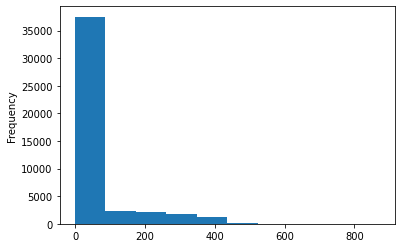

In [ ]:
data['pdays'].plot(kind='hist', bins=10)

In [ ]:
data['pdays'].value_counts(normalize=True)

-1      0.817367
 182    0.003694
 92     0.003251
 183    0.002787
 91     0.002787
          ...   
 749    0.000022
 717    0.000022
 589    0.000022
 493    0.000022
 32     0.000022
Name: pdays, Length: 559, dtype: float64

In [ ]:
data_y_yes['pdays'].value_counts(normalize=True)

-1      0.639818
 92     0.018151
 182    0.015126
 91     0.014180
 181    0.013991
          ...   
 481    0.000189
 477    0.000189
 469    0.000189
 449    0.000189
 4      0.000189
Name: pdays, Length: 423, dtype: float64

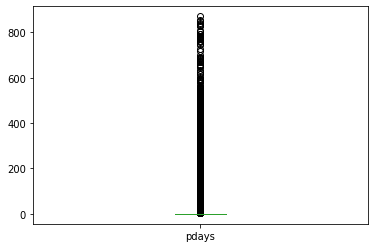

In [ ]:
data['pdays'].plot(kind='box')

In [ ]:
data['previous'].value_counts(normalize='True')

0      0.817367
1      0.061313
2      0.046582
3      0.025259
4      0.015793
5      0.010152
6      0.006127
7      0.004534
8      0.002853
9      0.002035
10     0.001482
11     0.001438
12     0.000973
13     0.000841
15     0.000442
14     0.000420
17     0.000332
16     0.000288
19     0.000243
23     0.000177
20     0.000177
22     0.000133
18     0.000133
24     0.000111
27     0.000111
29     0.000088
25     0.000088
21     0.000088
30     0.000066
28     0.000044
26     0.000044
37     0.000044
38     0.000044
55     0.000022
40     0.000022
35     0.000022
58     0.000022
51     0.000022
41     0.000022
32     0.000022
275    0.000022
Name: previous, dtype: float64

In [ ]:
data_y_yes['previous'].value_counts(normalize='True')

0     0.639818
1     0.110229
2     0.086217
3     0.055587
4     0.032331
5     0.022878
6     0.015693
7     0.010210
8     0.007374
10    0.004916
9     0.004538
11    0.002836
12    0.001891
13    0.001702
14    0.000945
17    0.000567
19    0.000378
20    0.000189
15    0.000189
58    0.000189
30    0.000189
21    0.000189
29    0.000189
23    0.000189
22    0.000189
26    0.000189
55    0.000189
Name: previous, dtype: float64

## Identifying Null values

In [ ]:
data.loc[data['age'].isna()]

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,scaled_age


In [ ]:
data['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
data.loc[data['balance'].isna()]

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,scaled_age


In [ ]:
data['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353])

In [ ]:
data.loc[data['campaign'].isna()]

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,scaled_age


In [ ]:
data.loc[data['pdays'].isna()]

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,scaled_age


## Identifying outliers

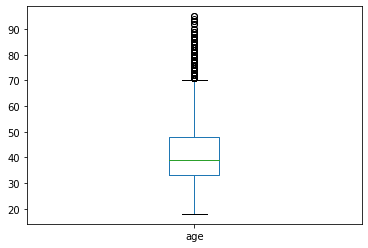

In [ ]:
data['age'].plot(kind='box')

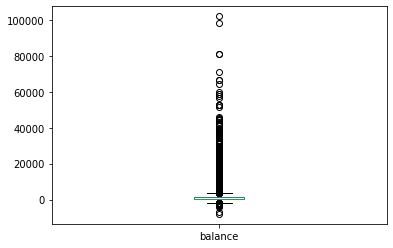

In [ ]:
data['balance'].plot(kind='box')

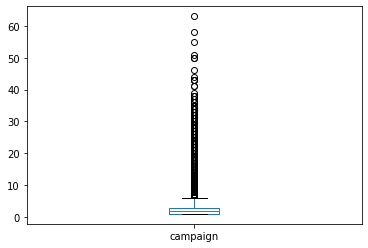

In [ ]:
data['campaign'].plot(kind='box')

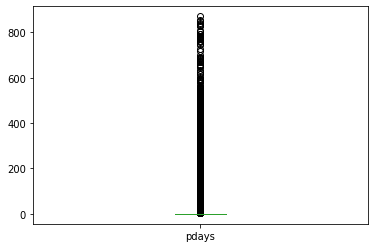

In [ ]:
data['pdays'].plot(kind='box')

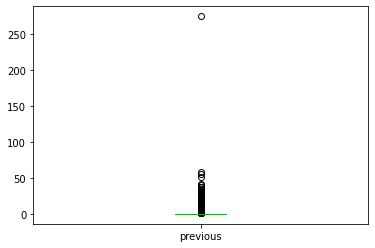

In [ ]:
data['previous'].plot(kind='box')

## Correlation

In [ ]:
data['y_act'] = np.where(data['y']=='yes',1,0)

In [ ]:
data[['y','y_act']].sample(15)

,y,y_act
5215,no,0
42989,yes,1
9937,no,0
31628,no,0
34243,yes,1
28308,no,0
8165,no,0
11157,no,0
17709,yes,1
41222,no,0


In [ ]:
correlation_matrix = data[['age','balance','campaign','pdays','previous','y_act']].corr()
correlation_matrix 

,age,balance,campaign,pdays,previous,y_act
age,1.000000,0.097783,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,-0.014578,0.003435,0.016674,0.052838
campaign,0.004760,-0.014578,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.032855,0.454820,1.000000,0.093236
y_act,0.025155,0.052838,-0.073172,0.103621,0.093236,1.000000


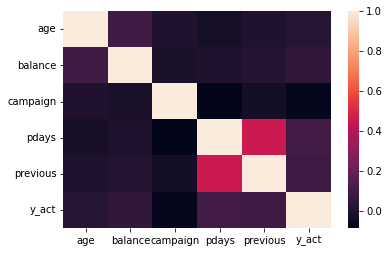

In [ ]:
sns.heatmap(correlation_matrix)

## Standardizing numerical variables

In [ ]:
from sklearn.preprocessing import StandardScaler


data[['age','balance','campaign','previous']] = StandardScaler().fit_transform(data[['age','balance','campaign','previous']])

In [ ]:
data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,scaled_age,y_act
count,45211.000000,4.521100e+04,4.521100e+04,45211.000000,45211.000000,4.521100e+04,45211.000000,4.521100e+04,45211.000000,45211.000000
mean,22606.000000,5.222844e-16,3.070663e-15,15.806419,258.163080,1.254699e-14,40.197828,1.355210e-13,0.430907,0.116985
std,13051.435847,1.000011e+00,1.000011e+00,8.322476,257.527812,1.000011e+00,100.128746,1.000011e+00,0.111776,0.321406
min,1.000000,-2.159994e+00,-3.081149e+00,1.000000,0.000000,-5.693506e-01,-1.000000,-2.519404e-01,0.189474,0.000000
25%,11303.500000,-7.473845e-01,-4.237719e-01,8.000000,103.000000,-5.693506e-01,-1.000000,-2.519404e-01,0.347368,0.000000
50%,22606.000000,-1.823406e-01,-3.002800e-01,16.000000,180.000000,-2.465603e-01,-1.000000,-2.519404e-01,0.410526,0.000000
75%,33908.500000,6.652252e-01,2.158743e-02,21.000000,319.000000,7.622994e-02,-1.000000,-2.519404e-01,0.505263,0.000000
max,45211.000000,5.091402e+00,3.309478e+01,31.000000,4918.000000,1.944365e+01,871.000000,1.191360e+02,1.000000,1.000000


#Exploring categorical variables

In [ ]:
data['job'].head()


0      management
1      technician
2    entrepreneur
3     blue-collar
4         unknown
Name: job, dtype: object

In [ ]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
len(data['job'].unique())

12

In [ ]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

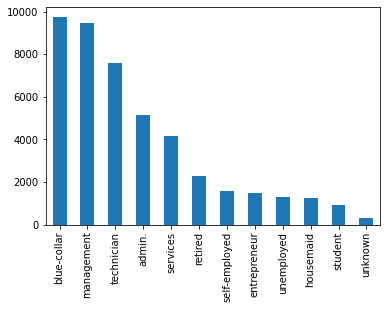

In [ ]:
data['job'].value_counts().plot(kind='bar')

In [ ]:
data['job'].loc[data['job']=='unknown']


4        unknown
216      unknown
354      unknown
876      unknown
1072     unknown
          ...   
44714    unknown
44742    unknown
44970    unknown
45141    unknown
45186    unknown
Name: job, Length: 288, dtype: object

In [ ]:
data.groupby(by='job')['ID'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: ID, dtype: int64

In [ ]:
data.groupby(by='job')['age'].min()

job
admin.          -1.971646
blue-collar     -1.971646
entrepreneur    -1.877472
housemaid       -1.783298
management      -1.877472
retired         -1.594950
self-employed   -1.783298
services        -1.971646
student         -2.159994
technician      -1.877472
unemployed      -1.877472
unknown         -1.500776
Name: age, dtype: float64

In [ ]:
data['job'] = data['job'].replace('unknown', 'blue-collar')

In [ ]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [ ]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
data['education'] = data['education'].replace('unknown', 'secondary')

In [ ]:
data['education'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [ ]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['housing'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
data['poutcome'].value_counts('normalise')

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

In [ ]:
data_y_yes['poutcome'].value_counts('normalise')

unknown    0.640197
success    0.184912
failure    0.116846
other      0.058045
Name: poutcome, dtype: float64

poutcome has insufficient data to be considered for the ML model. 81.75% ofthe data are "unknown"

In [ ]:
 def group_education_category(job):
      if job in ('unemployed','student','housemaid'):
        return 'job_category_1'
      if job in ('admin.','blue-collar','technician','services','retired'):
        return 'job_category_2'
      if job in ('entrepreneur','self-employed','management'):    
        return 'job_category_3'

In [ ]:
 data['job_group'] = data['job'].apply(group_education_category)

In [ ]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'scaled_age', 'y_act',
       'job_group'],
      dtype='object')

In [ ]:
data[['job','job_group']].sample(10)

,job,job_group
5978,management,job_category_3
42094,management,job_category_3
43693,unemployed,job_category_1
2441,technician,job_category_2
42851,unemployed,job_category_1
20047,technician,job_category_2
20552,unemployed,job_category_1
44218,management,job_category_3
26807,unemployed,job_category_1
5013,services,job_category_2


In [ ]:
#data = data.join(pd.get_dummies(data['job_group'],prefix='job_group'))
#data = data.join(pd.get_dummies(data['education'],prefix='education'))
#data = data.join(pd.get_dummies(data['default'],prefix='default'))
#data = data.join(pd.get_dummies(data['housing'],prefix='housing'))
#data = data.join(pd.get_dummies(data['loan'],prefix='loan'))
  

In [ ]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'scaled_age', 'y_act',
       'job_group'],
      dtype='object')

In [ ]:
correlation_matrix = data.corr()
correlation_matrix

,ID,age,balance,day,duration,campaign,pdays,previous,scaled_age,y_act
ID,1.000000,0.014973,0.073639,-0.061465,0.013031,-0.102884,0.437729,0.271098,0.014973,0.296287
age,0.014973,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,1.000000,0.025155
balance,0.073639,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.097783,0.052838
day,-0.061465,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.009120,-0.028348
duration,0.013031,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.004648,0.394521
campaign,-0.102884,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.004760,-0.073172
pdays,0.437729,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,-0.023758,0.103621
previous,0.271098,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.001288,0.093236
scaled_age,0.014973,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,1.000000,0.025155
y_act,0.296287,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,0.025155,1.000000


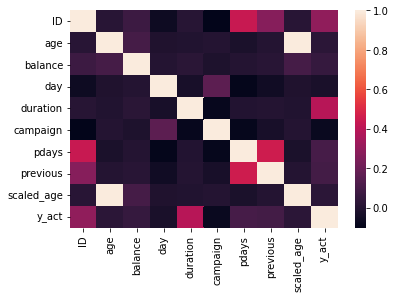

In [ ]:
sns.heatmap(correlation_matrix)

In [ ]:
data.sample(3)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,scaled_age,y_act,job_group
22620,22621,-0.747384,technician,married,tertiary,no,-0.437895,no,no,cellular,22,aug,94,-0.569351,-1,-0.251940,unknown,no,0.347368,0,job_category_2
31587,31588,-0.464863,technician,divorced,secondary,no,-0.228681,yes,yes,cellular,3,apr,190,-0.569351,133,0.182198,other,no,0.378947,0,job_category_2
28656,28657,-1.029906,self-employed,married,secondary,no,0.114863,no,no,cellular,29,jan,213,0.076230,190,0.616335,failure,no,0.315789,0,job_category_3


In [ ]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'scaled_age', 'y_act',
       'job_group'],
      dtype='object')

In [ ]:
#X_variables = ['age','balance', 'campaign','previous','job_group_job_category_1''job_group_job_category_2', 'job_group_job_category_3','education_primary', 'education_secondary', 'education_tertiary','default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',       'loan_yes']
#data[X_variables].head()


In [ ]:
#X = data[X_variables].values
#X

# Data Pre-processing Function

In [ ]:
def pre_processing(data):    
    data['id'] = data.index+1

    #Standardizinig numerical variables
    data[['age','balance','campaign','previous']] = StandardScaler().fit_transform(data[['age','balance','campaign','previous']])

    #Replacing 'unknowns' (nul values) with highest frequency category of each column
    data['job'] = data['job'].replace('unknown', 'blue-collar')
    data['education'] = data['education'].replace('unknown', 'secondary')

    #Function to group job categories
    def group_education_category(job):
      if job in ('unemployed','student','housemaid'):
        return 'job_category_1'
      if job in ('admin.','blue-collar','technician','services','retired'):
        return 'job_category_2'
      if job in ('entrepreneur','self-employed','management'):    
        return 'job_category_3'

    #Group job categories into job groups
    data['job_group'] = data['job'].apply(group_education_category)

    #One hot encoding categorical variables
    data = data.join(pd.get_dummies(data['job_group'],prefix='job_group'))
    data = data.join(pd.get_dummies(data['education'],prefix='education'))
    data = data.join(pd.get_dummies(data['default'],prefix='default'))
    data = data.join(pd.get_dummies(data['housing'],prefix='housing'))
    data = data.join(pd.get_dummies(data['loan'],prefix='loan'))

    # Select Columns
    X_variables = ['age','balance', 'campaign','previous','job_group_job_category_1',
       'job_group_job_category_2', 'job_group_job_category_3',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes']

    # Assign 0 to missing columns
    for x in list(set(X_variables) - set(data.columns)):
      data[x] = 0
     
    return data[X_variables]

# Train Test Split

In [ ]:
pre_processed_data = pre_processing(data)
X = pre_processed_data.values
X


array([[ 1.60696496,  0.25641925, -0.56935064, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.28852927, -0.43789469, -0.56935064, ...,  1.        ,
         1.        ,  0.        ],
       [-0.74738448, -0.44676247, -0.56935064, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 2.92540065,  1.42959305,  0.72181052, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.51279098, -0.22802402,  0.39902023, ...,  0.        ,
         1.        ,  0.        ],
       [-0.37068857,  0.52836436, -0.24656035, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
data['y_act'].head()
y_variable = 'y_act'
pd.crosstab(data[y_variable], data['y'])

y,no,yes
y_act,,
0,39922,0
1,0,5289


In [ ]:
y = data[y_variable].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Re-sampling to treat class imbalance

## Random under sampling

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

## Oversampling using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Model Training Function

In [ ]:
def model_train(model, model_name, X_train_resampled, y_train_resampled, X_test, y_test):
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
    roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc,
                  })

# Fitting Multipe Models with Different Hyperparamaters

## (A) Manually explore hyper parameter space

In [ ]:
models = []
#models.append(model_train(LogisticRegression(n_jobs=3, verbose=1), 'lgr1', X_train_resampled, y_train_resampled, X_test, y_test))
#models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=3, verbose=1), 'rf1',  X_train_resampled, y_train_resampled, X_test, y_test))
#models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=3, verbose=1), 'rf2',  X_train_resampled, y_train_resampled, X_test, y_test))
#models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf3',  X_train_resampled, y_train_resampled, X_test, y_test))
#models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=3, verbose=1), 'rf4',  X_train_resampled, y_train_resampled, X_test, y_test))
models.append(model_train(LogisticRegression(n_jobs=3, verbose=1), 'lgr1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=3, verbose=1), 'rf1',  X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=3, verbose=1), 'rf2',  X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=3, verbose=1), 'rf3',  X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf4',  X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=15, n_jobs=3, verbose=1), 'rf5',  X_train, y_train, X_test, y_test))

models = pd.DataFrame(models)
models

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n

,model_name,model,accuracy,precision,f1_score,roc_auc
0,lgr1,"LogisticRegression(n_jobs=3, verbose=1)",0.880861,0.235294,0.827428,0.692686
1,rf1,"(DecisionTreeClassifier(max_features='auto', r...",0.865600,0.348587,0.843375,0.661394
2,rf2,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.882704,0.524476,0.837052,0.718848
3,rf3,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.882262,1.000000,0.827149,0.715145
4,rf4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.882409,0.510490,0.836642,0.720152
5,rf5,"(DecisionTreeClassifier(max_depth=15, max_feat...",0.880271,0.462857,0.844886,0.704867


## (B) Use of grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100,500], 'max_depth': [None, 5, 10]}
gs_model = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=2, verbose=3, pre_dispatch=2)
gs_model.fit(X_train, y_train)          

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 500]},
             pre_dispatch=2, verbose=3)

In [ ]:
#Best Model Parametrs
print(gs_model.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = gs_model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11966
           1       0.46      0.05      0.08      1598

    accuracy                           0.88     13564
   macro avg       0.68      0.52      0.51     13564
weighted avg       0.84      0.88      0.84     13564

[[11882    84]
 [ 1525    73]]


In [ ]:
model = models.query("model_name == 'rf3'")

#model_best = RandomForestClassifier(n_estimators=150, max_depth=10, n_jobs=3, verbose=1).fit(X_train,y_train)
model_best = LogisticRegression(n_jobs=3, verbose=1).fit(X_train_resampled,y_train_resampled)
y_pred = model_best.predict(X_test)

#y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76     11966
           1       0.19      0.63      0.30      1598

    accuracy                           0.65     13564
   macro avg       0.56      0.64      0.53     13564
weighted avg       0.84      0.65      0.71     13564

[[7738 4228]
 [ 584 1014]]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.1s finished


# Select the best model

In [ ]:
# Select best model 
model = models.query("model_name=='rf2'")
model

,model_name,model,accuracy,precision,f1_score,roc_auc
2,rf2,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.882704,0.524476,0.837052,0.718848


# Saving the best model

## Use Pickle

In [ ]:
import pickle

save_file = 'model_rf3_test.pickle'
pickle.dump(model, open(save_file, 'wb'))

In [ ]:
# loading from file
model_ = pickle.load(open(save_file, 'rb'))
model_

,model_name,model,accuracy,precision,f1_score,roc_auc
2,rf2,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.882704,0.524476,0.837052,0.718848


## Use Joblib

In [ ]:
import joblib

save_file = 'model_rf3_test.joblib'
joblib.dump(model, open(save_file, 'wb'))

In [ ]:
# loading from file
model_ = joblib.load(save_file)
model_

,model_name,model,accuracy,precision,f1_score,roc_auc
2,rf2,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.882704,0.524476,0.837052,0.718848


# Predict on a Sample Data

## Score function

In [ ]:
sample_input = data[['age', 'balance','campaign', 'previous', 'job', 'education', 'default', 'housing', 'loan'] ].sample(10)
sample_input

,age,balance,campaign,previous,job,education,default,housing,loan
33069,-0.841558,-0.231965,-0.246560,-0.25194,management,tertiary,no,yes,yes
9767,-0.370689,-0.447419,-0.569351,-0.25194,admin.,secondary,yes,no,no
14945,-0.841558,-0.409321,-0.246560,-0.25194,admin.,secondary,no,no,yes
17335,-1.124080,-0.265794,0.721811,-0.25194,services,secondary,no,no,yes
28010,0.100181,-0.395855,-0.569351,-0.25194,management,tertiary,no,yes,yes
31131,-0.935732,-0.404394,-0.246560,-0.25194,management,tertiary,no,no,no
27498,-0.653211,-0.163979,-0.246560,-0.25194,technician,secondary,no,no,no
11508,-1.689124,-0.704256,2.335762,-0.25194,technician,secondary,no,yes,yes
33540,-1.124080,-0.436253,0.399020,-0.25194,blue-collar,secondary,no,yes,no
17615,1.701139,0.377612,0.399020,-0.25194,retired,tertiary,no,no,no


In [ ]:
pre_processing(sample_input)

,age,balance,campaign,previous,job_group_job_category_1,job_group_job_category_2,job_group_job_category_3,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
33069,-0.298549,0.284256,-0.505641,5.551115e-17,0,0,1,0,0,1,1,0,0,1,0,1
9767,0.234574,-0.519503,-0.894596,5.551115e-17,0,1,0,0,1,0,0,1,1,0,1,0
14945,-0.298549,-0.377375,-0.505641,5.551115e-17,0,1,0,0,1,0,1,0,1,0,0,1
17335,-0.618423,0.158056,0.661223,5.551115e-17,0,1,0,0,1,0,1,0,1,0,0,1
28010,0.767697,-0.327140,-0.894596,5.551115e-17,0,0,1,0,0,1,1,0,0,1,0,1
31131,-0.405173,-0.358996,-0.505641,5.551115e-17,0,0,1,0,0,1,1,0,1,0,1,0
27498,-0.085300,0.537882,-0.505641,5.551115e-17,0,1,0,0,1,0,1,0,1,0,1,0
11508,-1.258170,-1.477643,2.605998,5.551115e-17,0,1,0,0,1,0,1,0,0,1,0,1
33540,-0.618423,-0.477845,0.272268,5.551115e-17,0,1,0,0,1,0,1,0,0,1,1,0
17615,2.580315,2.558308,0.272268,5.551115e-17,0,1,0,0,0,1,1,0,1,0,1,0


In [ ]:
model_best.predict_proba(pre_processing(sample_input))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[0.66500225, 0.33499775],
       [0.38884362, 0.61115638],
       [0.52236839, 0.47763161],
       [0.62004436, 0.37995564],
       [0.6390438 , 0.3609562 ],
       [0.34043114, 0.65956886],
       [0.3635551 , 0.6364449 ],
       [0.89791875, 0.10208125],
       [0.65450239, 0.34549761],
       [0.33750989, 0.66249011]])

In [ ]:
def score(input_data, model):
    return model_best.predict_proba(input_data)

In [ ]:
prediction = score(input_data=pre_processing(sample_input), model=model_best)
prediction

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[0.66500225, 0.33499775],
       [0.38884362, 0.61115638],
       [0.52236839, 0.47763161],
       [0.62004436, 0.37995564],
       [0.6390438 , 0.3609562 ],
       [0.34043114, 0.65956886],
       [0.3635551 , 0.6364449 ],
       [0.89791875, 0.10208125],
       [0.65450239, 0.34549761],
       [0.33750989, 0.66249011]])

# Post-processing Function for Prediction

In [ ]:
def post_processing(prediction):
    if len(prediction)==1:
        return prediction[:, 1][0]
    else:
        return prediction[:, 1]

In [ ]:
output = post_processing(score(input_data=pre_processing(sample_input), model=model_best))
output

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0.33499775, 0.61115638, 0.47763161, 0.37995564, 0.3609562 ,
       0.65956886, 0.6364449 , 0.10208125, 0.34549761, 0.66249011])

In [ ]:
# Create new column in input dataset
sample_input['prediction'] = post_processing(model_best.predict_proba(pre_processing(sample_input)))
sample_input

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,age,balance,campaign,previous,job,education,default,housing,loan,id,job_group,prediction
33069,-0.298549,0.284256,-0.505641,0.0,management,tertiary,no,yes,yes,33070,job_category_3,0.334998
9767,0.234574,-0.519503,-0.894596,0.0,admin.,secondary,yes,no,no,9768,job_category_2,0.611156
14945,-0.298549,-0.377375,-0.505641,0.0,admin.,secondary,no,no,yes,14946,job_category_2,0.477632
17335,-0.618423,0.158056,0.661223,0.0,services,secondary,no,no,yes,17336,job_category_2,0.379956
28010,0.767697,-0.327140,-0.894596,0.0,management,tertiary,no,yes,yes,28011,job_category_3,0.360956
31131,-0.405173,-0.358996,-0.505641,0.0,management,tertiary,no,no,no,31132,job_category_3,0.659569
27498,-0.085300,0.537882,-0.505641,0.0,technician,secondary,no,no,no,27499,job_category_2,0.636445
11508,-1.258170,-1.477643,2.605998,0.0,technician,secondary,no,yes,yes,11509,job_category_2,0.102081
33540,-0.618423,-0.477845,0.272268,0.0,blue-collar,secondary,no,yes,no,33541,job_category_2,0.345498
17615,2.580315,2.558308,0.272268,0.0,retired,tertiary,no,no,no,17616,job_category_2,0.662490


In [ ]:
# Output value 
sample_output = post_processing(score(input_data=pre_processing(sample_input), model=model_best))
sample_output

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0.33499775, 0.61115638, 0.47763161, 0.37995564, 0.3609562 ,
       0.65956886, 0.6364449 , 0.10208125, 0.34549761, 0.66249011])

#Prediction Function for Application (Inference Pipeline)

In [ ]:
def app_prediction_function(input_data, model):
    return post_processing(score(input_data=pre_processing(input_data), model=model_best))

# Explaining the Machine Learning Model

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 27.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=863d9e83ee8ef2282d85e75f5689670ee16d9d87a4ae897c589465b0fb0a2d2c
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 31.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509255 sha256=2b46018e0eee1934650185d0477bc07b7fc7f4f9246e65e9b030972c1948a3af
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import lime 
from lime import lime_tabular

import shap

In [ ]:
model_best = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=3, verbose=1).fit(X_train,y_train)
y_pred = model_best.predict(X_test)

test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':model_best.predict_proba(X_test)[:, 0], 'y_pred_prob_1':model_best.predict_proba(X_test)[:, 1]})
test_result.head(10)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


,y_act,y_pred,y_pred_prob_0,y_pred_prob_1
0,0,0,0.937449,0.062551
1,0,0,0.873518,0.126482
2,0,0,0.932079,0.067921
3,0,0,0.613038,0.386962
4,0,0,0.925930,0.074070
5,0,0,0.862038,0.137962
6,0,0,0.791022,0.208978
7,0,0,0.919991,0.080009
8,0,0,0.927791,0.072209
9,0,0,0.933096,0.066904


In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,11893,73,11966
1,1520,78,1598
All,13413,151,13564


In [ ]:
# Let's take Class "1" is the desired class
y_pred = model_best.predict(X_test)
y_pred_prob = model_best.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
test_result = pd.DataFrame(data={'y_act':y_test=='1', 'y_pred':y_pred=='1', 'y_pred_prob':y_pred_prob})
test_result.sample(10)

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


,y_act,y_pred,y_pred_prob
6412,False,False,0.053136
2578,False,False,0.064515
1478,False,False,0.095943
11302,False,False,0.111659
9901,False,False,0.041559
10995,False,False,0.053508
6776,False,False,0.380545
1445,False,False,0.136195
1274,False,False,0.305985
11012,False,False,0.061167


In [ ]:
test_result[['y_act', 'y_pred']] = test_result[['y_act', 'y_pred']].astype('int')
test_result

,y_act,y_pred,y_pred_prob
0,0,0,0.062551
1,0,0,0.126482
2,0,0,0.067921
3,0,0,0.386962
4,0,0,0.074070
...,...,...,...
13559,0,0,0.190836
13560,0,0,0.070131
13561,0,0,0.110229
13562,0,0,0.110571


In [ ]:
acuracy_rf = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_rf

1.0

In [ ]:
precision_rf = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
precision_rf

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


0.0

In [ ]:
test_result['q_bucket'] = pd.qcut(test_result['y_pred_prob'], q=10, duplicates='drop')
test_result['q_bucket']

calib_table  = test_result.groupby(by='q_bucket').agg(
    count=pd.NamedAgg(column="q_bucket", aggfunc="count"),
    response_count=pd.NamedAgg(column="y_act", aggfunc="sum"),
    min_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="min"),
    mean_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="mean"),
    ).reset_index()

calib_table['precision'] = calib_table['response_count'] / calib_table['count'] 
calib_table['response_fraction'] = calib_table['response_count'] / calib_table['response_count'].sum()
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction
0,"(0.0148, 0.0476]",1357,0,0.015827,0.039500,0.0,NaN
1,"(0.0476, 0.0561]",1356,0,0.047614,0.052097,0.0,NaN
2,"(0.0561, 0.0624]",1356,0,0.056139,0.059275,0.0,NaN
3,"(0.0624, 0.0695]",1357,0,0.062354,0.065874,0.0,NaN
4,"(0.0695, 0.0781]",1356,0,0.069546,0.073326,0.0,NaN
5,"(0.0781, 0.0925]",1356,0,0.078076,0.084331,0.0,NaN
6,"(0.0925, 0.115]",1357,0,0.092503,0.102851,0.0,NaN
7,"(0.115, 0.146]",1356,0,0.114796,0.130732,0.0,NaN
8,"(0.146, 0.226]",1356,0,0.146424,0.176600,0.0,NaN
9,"(0.226, 0.851]",1357,0,0.226384,0.390532,0.0,NaN


## Feature Importance

In [ ]:
feature_importances = model_best.feature_importances_
feature_importances

array([0.25510657, 0.19075194, 0.07445672, 0.21633815, 0.01370722,
       0.01352815, 0.01053164, 0.01222065, 0.01247793, 0.01833858,
       0.00305043, 0.00329164, 0.08195005, 0.05874397, 0.01793603,
       0.01757033])

In [ ]:
features = pre_processed_data.columns
features

Index(['age', 'balance', 'campaign', 'previous', 'job_group_job_category_1',
       'job_group_job_category_2', 'job_group_job_category_3',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes'],
      dtype='object')

In [ ]:
feature_importance_table = pd.DataFrame(data={'features': features, 'feature_importances':feature_importances})
feature_importance_table

,features,feature_importances
0,age,0.255107
1,balance,0.190752
2,campaign,0.074457
3,previous,0.216338
4,job_group_job_category_1,0.013707
5,job_group_job_category_2,0.013528
6,job_group_job_category_3,0.010532
7,education_primary,0.012221
8,education_secondary,0.012478
9,education_tertiary,0.018339


In [ ]:
feature_importance_table['feature_importances'].sum()

0.9999999999999999

In [ ]:
feature_importance_table.sort_values(by='feature_importances', ascending=False)

,features,feature_importances
0,age,0.255107
3,previous,0.216338
1,balance,0.190752
12,housing_no,0.081950
2,campaign,0.074457
13,housing_yes,0.058744
9,education_tertiary,0.018339
14,loan_no,0.017936
15,loan_yes,0.017570
4,job_group_job_category_1,0.013707


##Explain with LIME (Local Interpretable Model-agnostic Explanation)

In [ ]:
test_sample_features = pre_processed_data.sample()
test_sample_features

,age,balance,campaign,previous,job_group_job_category_1,job_group_job_category_2,job_group_job_category_3,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
29307,0.759399,-0.395855,-0.24656,-0.25194,1,0,0,1,0,0,1,0,0,1,1,0


In [ ]:
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=X_train,feature_names=features,class_names=['0', '1'], mode='classification')


lime_exp = lime_explainer.explain_instance(data_row=test_sample_features.values[0],predict_fn=model_best.predict_proba)
lime_exp.show_in_notebook(show_table=True)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


## Explain with SHAP

In [ ]:
explainer = shap.TreeExplainer(model_best)

In [ ]:
[explainer.expected_value[0], explainer.expected_value[1]]

[0.8835112332922549, 0.11648876670774477]

In [ ]:
shap_values = explainer(X_train)
shap_values

.values =
array([[[ 0.01173421, -0.01173421],
        [ 0.02978119, -0.02978119],
        [ 0.00908742, -0.00908742],
        ...,
        [-0.01519934,  0.01519934],
        [-0.00216336,  0.00216336],
        [-0.00234875,  0.00234875]],

       [[ 0.02081563, -0.02081563],
        [ 0.00122419, -0.00122419],
        [ 0.00531693, -0.00531693],
        ...,
        [-0.01440022,  0.01440022],
        [-0.00289722,  0.00289722],
        [-0.00293233,  0.00293233]],

       [[ 0.01417252, -0.01417252],
        [ 0.02038435, -0.02038435],
        [-0.00033797,  0.00033797],
        ...,
        [ 0.00855741, -0.00855741],
        [-0.00150988,  0.00150988],
        [-0.00130978,  0.00130978]],

       ...,

       [[ 0.0085136 , -0.0085136 ],
        [-0.00575911,  0.00575911],
        [-0.00881109,  0.00881109],
        ...,
        [ 0.01970125, -0.01970125],
        [-0.00210137,  0.00210137],
        [-0.00234303,  0.00234303]],

       [[ 0.01292169, -0.01292169],
        [ 0.00103

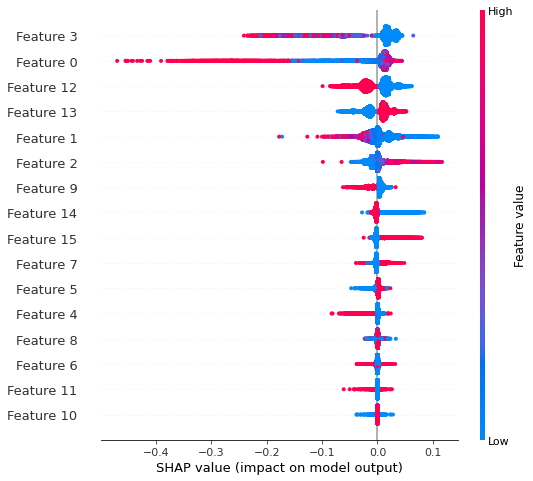

In [ ]:
shap.summary_plot(shap_values.values[:,:, 0], X_train)

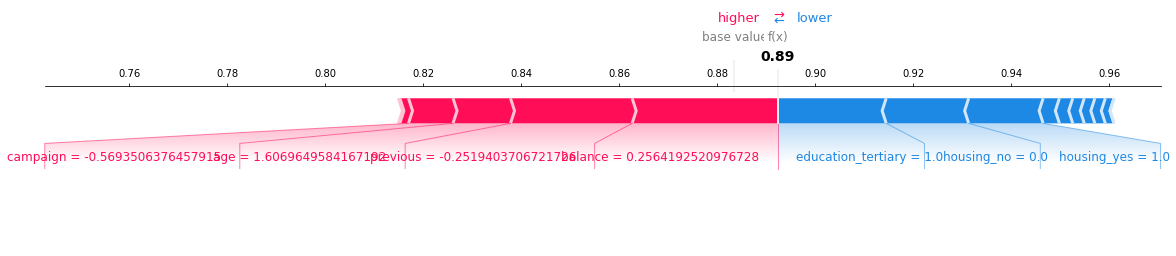

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values.values[:,:, 0][0], pre_processed_data.head(1), matplotlib = True)